# **Prayas Mazumder**
# **2021CSB071**
# **ML assignment 4**

In [ ]:
!pip install tensorflow
!pip install keras

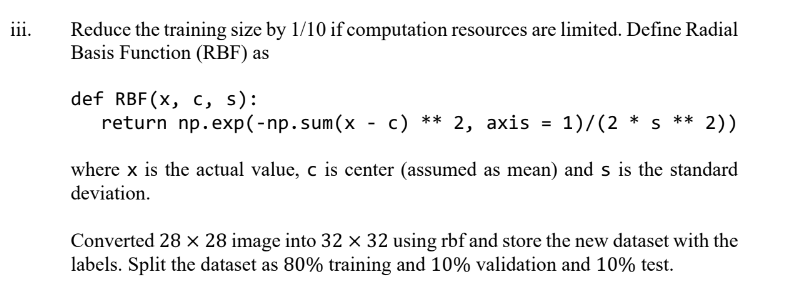

In [ ]:
import numpy as np
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Optionally reduce the training size by 1/10 if resources are limited
x_train = x_train[:len(x_train)//10]
y_train = y_train[:len(y_train)//10]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Radial Basis Function (RBF)**

In [ ]:
def RBF(x, c, s):
    return np.exp(-np.sum((x - c)**2, axis=1) / (2 * s**2))


In [ ]:
# Define new image size
new_size = 32

# Resize the 28x28 images to 32x32
def resize_images_with_rbf(images, new_size=32):
    mean_image = np.mean(images, axis=0)  # Treat the mean as the center
    std_dev = np.std(images)  # Standard deviation for RBF scaling

    resized_images = []

    for img in images:
        # Apply the RBF to resize the image
        rbf_image = RBF(img, mean_image, std_dev)
        # Reshape to 32x32 by interpolation or any other method
        resized_image = np.resize(rbf_image, (new_size, new_size))
        resized_images.append(resized_image)

    return np.array(resized_images)

# Resize the training and test images
x_train_resized = resize_images_with_rbf(x_train, new_size)
x_test_resized = resize_images_with_rbf(x_test, new_size)


# **splitting**

In [ ]:
# Shuffle and split the training data into 80% train and 10% validation
train_size = int(0.8 * len(x_train_resized))
val_size = len(x_train_resized) - train_size

# Split training and validation data
x_train_final = x_train_resized[:train_size]
y_train_final = y_train[:train_size]

x_val = x_train_resized[train_size:]
y_val = y_train[train_size:]

# Test data remains the same
x_test_final = x_test_resized
y_test_final = y_test


In [ ]:
# Save the resized dataset with labels
np.savez('mnist_rbf_resized.npz', x_train=x_train_final, y_train=y_train_final, x_val=x_val, y_val=y_val, x_test=x_test_final, y_test=y_test_final)


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical


# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

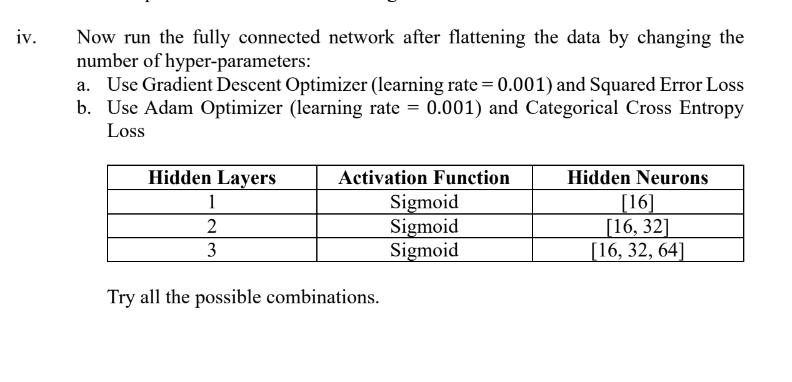

In [ ]:

hidden_layer_configurations = [
    [16],            # 1 hidden layer
    [16, 32],        # 2 hidden layers
    [16, 32, 64]     # 3 hidden layers
]
activation_function = 'sigmoid'
learning_rate = 0.001
batch_size = 128
epochs = 5

# Function to create a model
def create_model(hidden_layers, optimizer_choice):
    model = Sequential()

    # Flatten the input
    model.add(Flatten(input_shape=(28, 28)))

    # Add hidden layers
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation=activation_function))

    # Output layer with 10 classes (digits 0-9)
    model.add(Dense(10, activation='softmax'))

    if optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
        loss = 'mean_squared_error'
    elif optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
        loss = 'categorical_crossentropy'

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

# Iterate over all configurations
for hidden_layers in hidden_layer_configurations:
    for optimizer_choice in ['sgd', 'adam']:
        print(f"\nTraining model with hidden layers: {hidden_layers}, optimizer: {optimizer_choice}")

        # Create the model
        model = create_model(hidden_layers, optimizer_choice)

        # Train the model
        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
        print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



Training model with hidden layers: [16], optimizer: sgd


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 5s - 12ms/step - accuracy: 0.0972 - loss: 0.0921 - val_accuracy: 0.0990 - val_loss: 0.0919
Epoch 2/5
422/422 - 5s - 11ms/step - accuracy: 0.0972 - loss: 0.0921 - val_accuracy: 0.0990 - val_loss: 0.0919
Epoch 3/5
422/422 - 7s - 15ms/step - accuracy: 0.0972 - loss: 0.0920 - val_accuracy: 0.0990 - val_loss: 0.0918
Epoch 4/5
422/422 - 2s - 6ms/step - accuracy: 0.0973 - loss: 0.0920 - val_accuracy: 0.0990 - val_loss: 0.0918
Epoch 5/5
422/422 - 1s - 3ms/step - accuracy: 0.0973 - loss: 0.0919 - val_accuracy: 0.0990 - val_loss: 0.0917
313/313 - 0s - 1ms/step - accuracy: 0.0982 - loss: 0.0919
Test Loss: 0.0918978899717331, Test Accuracy: 0.0982000008225441

Training model with hidden layers: [16], optimizer: adam
Epoch 1/5
422/422 - 2s - 6ms/step - accuracy: 0.7190 - loss: 1.3283 - val_accuracy: 0.8825 - val_loss: 0.7721
Epoch 2/5
422/422 - 3s - 7ms/step - accuracy: 0.8716 - loss: 0.6467 - val_accuracy: 0.9108 - val_loss: 0.4537
Epoch 3/5
422/422 - 2s - 5ms/step - accuracy: 

# **Part V: Change the Activation Function Hyperparameter**

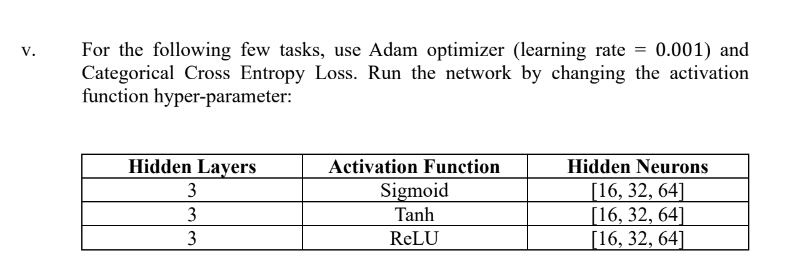

In [ ]:

# Hyperparameters
hidden_layers = [16, 32, 64]
activation_functions = ['sigmoid', 'tanh', 'relu']
learning_rate = 0.001
batch_size = 128
epochs = 10

# Function to create a model ****************************
def create_model(activation_function):
    model = Sequential()

    # Flatten the input
    model.add(Flatten(input_shape=(28, 28)))

    # Add 3 hidden layers with the specified activation function
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation=activation_function))

    # Output layer with 10 classes
    model.add(Dense(10, activation='softmax'))

    # Use Adam optimizer and categorical crossentropy loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Iterate over different activation functions
for activation_function in activation_functions:
    print(f"\nTraining model with activation function: {activation_function}")

    # Create the model
    model = create_model(activation_function)

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



Training model with activation function: sigmoid
Epoch 1/10
422/422 - 5s - 12ms/step - accuracy: 0.4568 - loss: 1.7680 - val_accuracy: 0.7610 - val_loss: 0.9922
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.8113 - loss: 0.7215 - val_accuracy: 0.8950 - val_loss: 0.4499
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.8879 - loss: 0.4225 - val_accuracy: 0.9205 - val_loss: 0.3108
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.9083 - loss: 0.3336 - val_accuracy: 0.9278 - val_loss: 0.2621
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9183 - loss: 0.2910 - val_accuracy: 0.9340 - val_loss: 0.2352
Epoch 6/10
422/422 - 3s - 8ms/step - accuracy: 0.9250 - loss: 0.2641 - val_accuracy: 0.9407 - val_loss: 0.2187
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9308 - loss: 0.2443 - val_accuracy: 0.9415 - val_loss: 0.2051
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.9356 - loss: 0.2291 - val_accuracy: 0.9442 - val_loss: 0.1971
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9389 - loss:

# **Part VI: Changing Dropout Hyperparameters**

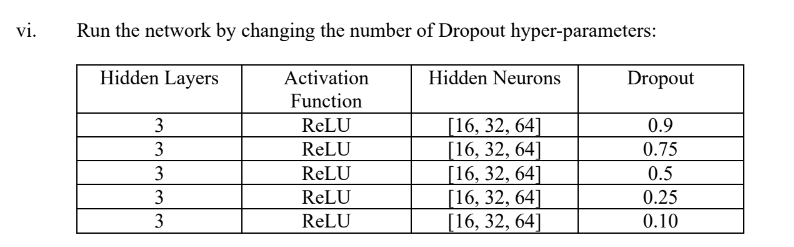

In [ ]:
from keras.layers import Dropout

# Dropout rates to try
dropout_rates = [0.9, 0.75, 0.5, 0.25, 0.1]

# Function to create a model with dropout
def create_model_with_dropout(dropout_rate):
    model = Sequential()

    # Flatten the input
    model.add(Flatten(input_shape=(28, 28)))

    # Add hidden layers with ReLU activation and dropout
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output layer with 10 classes
    model.add(Dense(10, activation='softmax'))

    # Use Adam optimizer and categorical crossentropy loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Iterate over different dropout rates
for dropout_rate in dropout_rates:
    print(f"\nTraining model with dropout rate: {dropout_rate}")

    # Create the model
    model = create_model_with_dropout(dropout_rate)

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



Training model with dropout rate: 0.9
Epoch 1/10
422/422 - 4s - 11ms/step - accuracy: 0.1117 - loss: 2.3399 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.1131 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.1132 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.1131 - loss: 2.3015 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 9/10
422/422 - 3s - 8ms/step - accuracy: 0.1132 - loss: 2.3012 - v

**************************************************************************
****************************************
***************************
***

# **Part VIII: Plot Graphs for Loss vs Epoch and Accuracy vs Epoch**
# **vii. Plot the graph for loss vs epoch and accuracy (train and validation accuracy) vs**
# **epoch for all the above cases. Point out the logic in the report.**


Training model with activation function: sigmoid
Epoch 1/10
422/422 - 5s - 13ms/step - accuracy: 0.4913 - loss: 1.6863 - val_accuracy: 0.7830 - val_loss: 0.9648
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.8325 - loss: 0.7194 - val_accuracy: 0.8902 - val_loss: 0.4745
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.8831 - loss: 0.4650 - val_accuracy: 0.9115 - val_loss: 0.3526
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9002 - loss: 0.3808 - val_accuracy: 0.9197 - val_loss: 0.3051
Epoch 5/10
422/422 - 3s - 6ms/step - accuracy: 0.9094 - loss: 0.3372 - val_accuracy: 0.9260 - val_loss: 0.2797
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9165 - loss: 0.3084 - val_accuracy: 0.9287 - val_loss: 0.2612
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9215 - loss: 0.2863 - val_accuracy: 0.9333 - val_loss: 0.2460
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9258 - loss: 0.2678 - val_accuracy: 0.9350 - val_loss: 0.2384
Epoch 9/10
422/422 - 2s - 6ms/step - accuracy: 0.9301 - loss:

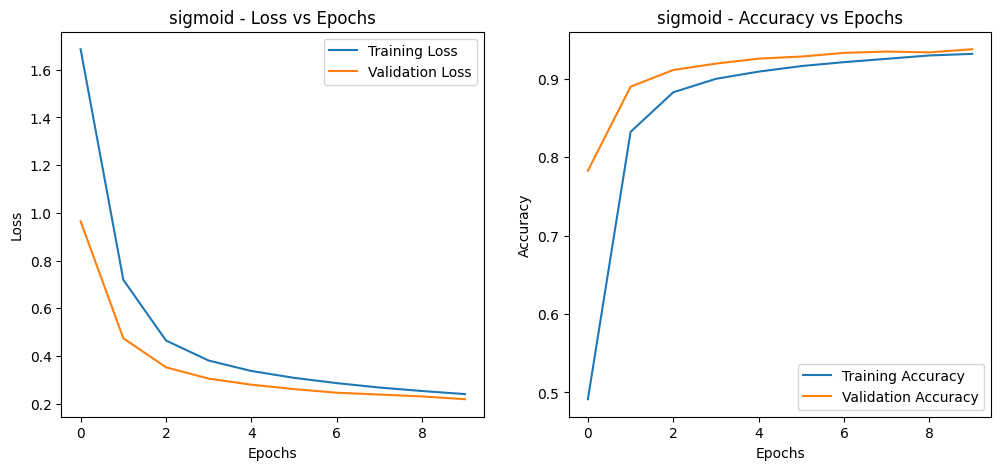


Training model with activation function: tanh
Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.8523 - loss: 0.5337 - val_accuracy: 0.9328 - val_loss: 0.2328
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9267 - loss: 0.2500 - val_accuracy: 0.9452 - val_loss: 0.1851
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9404 - loss: 0.2026 - val_accuracy: 0.9515 - val_loss: 0.1607
Epoch 4/10
422/422 - 3s - 6ms/step - accuracy: 0.9481 - loss: 0.1745 - val_accuracy: 0.9547 - val_loss: 0.1447
Epoch 5/10
422/422 - 4s - 8ms/step - accuracy: 0.9535 - loss: 0.1556 - val_accuracy: 0.9575 - val_loss: 0.1363
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9579 - loss: 0.1412 - val_accuracy: 0.9617 - val_loss: 0.1313
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9606 - loss: 0.1306 - val_accuracy: 0.9625 - val_loss: 0.1287
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.9631 - loss: 0.1217 - val_accuracy: 0.9592 - val_loss: 0.1318
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9642 - loss: 0.

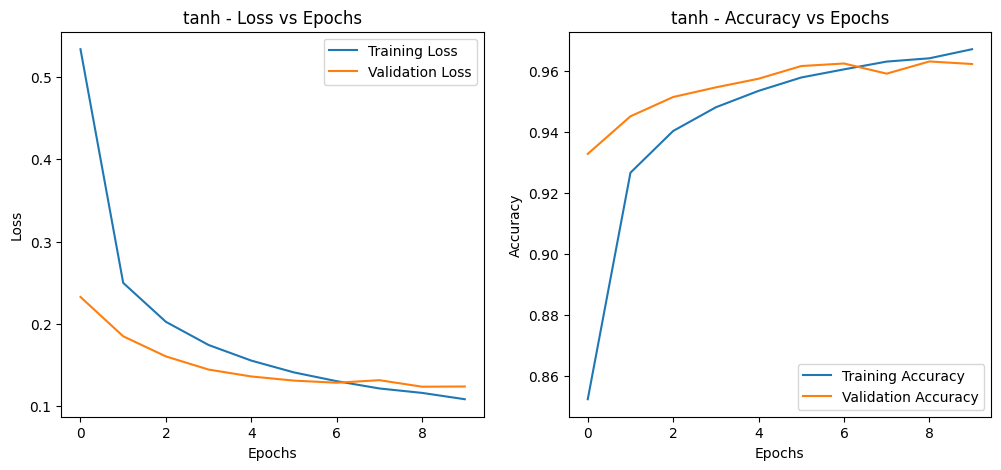


Training model with activation function: relu
Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.8141 - loss: 0.5963 - val_accuracy: 0.9373 - val_loss: 0.2183
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9280 - loss: 0.2461 - val_accuracy: 0.9493 - val_loss: 0.1807
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.9403 - loss: 0.2045 - val_accuracy: 0.9515 - val_loss: 0.1640
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9475 - loss: 0.1784 - val_accuracy: 0.9558 - val_loss: 0.1495
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9519 - loss: 0.1618 - val_accuracy: 0.9600 - val_loss: 0.1371
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.9557 - loss: 0.1479 - val_accuracy: 0.9618 - val_loss: 0.1358
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9591 - loss: 0.1381 - val_accuracy: 0.9615 - val_loss: 0.1269
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.9616 - loss: 0.1279 - val_accuracy: 0.9637 - val_loss: 0.1238
Epoch 9/10
422/422 - 3s - 7ms/step - accuracy: 0.9635 - loss: 0.

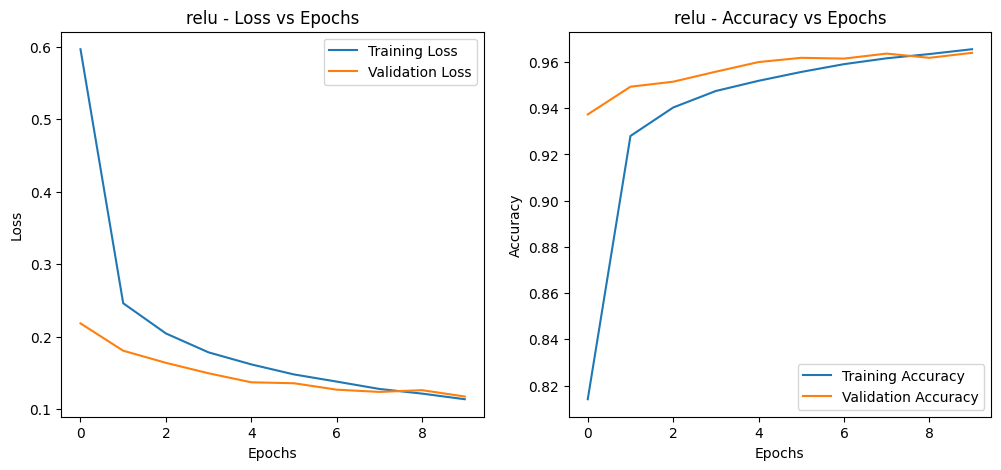

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy
def plot_metrics(history, activation_function):
    epochs = range(len(history.history['loss']))

    # Plot loss
    # ******************************************************
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{activation_function} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    # *****************************************************
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{activation_function} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Run training and plot metrics for each activation function
for activation_function in activation_functions:
    print(f"\nTraining model with activation function: {activation_function}")

    # Create and train the model
    model = create_model(activation_function)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_split=0.1, verbose=2)

    # Plot loss and accuracy
    plot_metrics(history, activation_function)


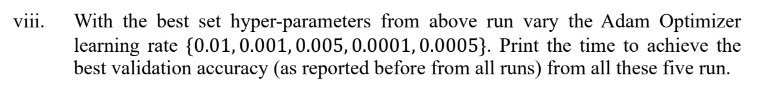

In [ ]:
import time

# Learning rates to try
learning_rates = [0.01, 0.001, 0.005, 0.0001, 0.0005]

# Function to train model and return the best validation accuracy and time
def train_with_learning_rate(lr):
    print(f"\nTraining with learning rate: {lr}")

    # Create the model with ReLU
    # ReLU is giving best results for previous experiments
    model = create_model('relu')

    # Compile with the given learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    # Train the model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10,
                        validation_split=0.1, verbose=2)
    end_time = time.time()

    best_val_acc = max(history.history['val_accuracy'])  # best validation accuracy
    time_taken = end_time - start_time

    print("\n")
    print(f"Best Validation Accuracy: {best_val_acc}, Time taken: {time_taken:.4f} seconds")
    return best_val_acc, time_taken
    print("\n")

# Iterating different learning rates
for lr in learning_rates:
    train_with_learning_rate(lr)



Training with learning rate: 0.01
Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.8896 - loss: 0.3578 - val_accuracy: 0.9465 - val_loss: 0.1788
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9370 - loss: 0.2128 - val_accuracy: 0.9528 - val_loss: 0.1616
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9421 - loss: 0.1908 - val_accuracy: 0.9510 - val_loss: 0.1680
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9481 - loss: 0.1734 - val_accuracy: 0.9555 - val_loss: 0.1667
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9494 - loss: 0.1665 - val_accuracy: 0.9597 - val_loss: 0.1446
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.9536 - loss: 0.1579 - val_accuracy: 0.9558 - val_loss: 0.1608
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9533 - loss: 0.1582 - val_accuracy: 0.9603 - val_loss: 0.1406
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.9563 - loss: 0.1484 - val_accuracy: 0.9547 - val_loss: 0.1608
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9556 - loss: 0.1525 - val_ac


Training with learning rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 - 44s - 26ms/step - accuracy: 0.9565 - loss: 0.1443 - val_accuracy: 0.9775 - val_loss: 0.0823
Epoch 2/10
1688/1688 - 41s - 24ms/step - accuracy: 0.9787 - loss: 0.0719 - val_accuracy: 0.9803 - val_loss: 0.0765
Epoch 3/10
1688/1688 - 45s - 27ms/step - accuracy: 0.9826 - loss: 0.0582 - val_accuracy: 0.9813 - val_loss: 0.0881
Epoch 4/10
1688/1688 - 80s - 47ms/step - accuracy: 0.9855 - loss: 0.0525 - val_accuracy: 0.9755 - val_loss: 0.1049
Epoch 5/10
1688/1688 - 80s - 47ms/step - accuracy: 0.9875 - loss: 0.0480 - val_accuracy: 0.9808 - val_loss: 0.1121
Epoch 6/10
1688/1688 - 83s - 49ms/step - accuracy: 0.9900 - loss: 0.0409 - val_accuracy: 0.9788 - val_loss: 0.1162
Epoch 7/10
1688/1688 - 83s - 49ms/step - accuracy: 0.9901 - loss: 0.0405 - val_accuracy: 0.9740 - val_loss: 0.1753
Epoch 8/10
1688/1688 - 41s - 24ms/step - accuracy: 0.9909 - loss: 0.0412 - val_accuracy: 0.9778 - val_loss: 0.1692
Epoch 9/10
1688/1688 - 86s - 51ms/step - accuracy: 0.9923 - loss: 0.0346 - val_a

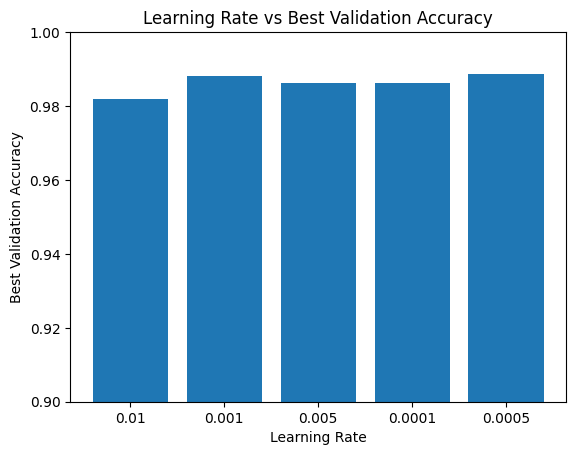

Learning Rate: 0.01 | Best Validation Accuracy: 0.9820 | Time Taken: 662.72 seconds
Learning Rate: 0.001 | Best Validation Accuracy: 0.9882 | Time Taken: 662.43 seconds
Learning Rate: 0.005 | Best Validation Accuracy: 0.9863 | Time Taken: 469.45 seconds
Learning Rate: 0.0001 | Best Validation Accuracy: 0.9863 | Time Taken: 387.63 seconds
Learning Rate: 0.0005 | Best Validation Accuracy: 0.9887 | Time Taken: 399.94 seconds


In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import necessary layers

learning_rates = [0.01, 0.001, 0.005, 0.0001, 0.0005]

def create_model(activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    return model

# Function to train model, return the best validation accuracy, and time taken
def train_with_learning_rate(lr):
    print(f"\nTraining with learning rate: {lr}")
    model = create_model('relu')
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=2)
    end_time = time.time()

    best_val_acc = max(history.history['val_accuracy'])

    time_taken = end_time - start_time

    # Print results
    print(f"Best Validation Accuracy: {best_val_acc:.4f}, Time taken: {time_taken:.2f} seconds")

    return best_val_acc, time_taken

# List to store best validation accuracies and times for each learning rate
best_accuracies = []
training_times = []

# Iterate over learning rates, train model, and collect results
for lr in learning_rates:
    best_acc, time_taken = train_with_learning_rate(lr)
    best_accuracies.append(best_acc)
    training_times.append(time_taken)

# Plot Learning Rate vs Best Validation Accuracy
plt.bar(range(len(learning_rates)), best_accuracies, tick_label=learning_rates)
plt.title('Learning Rate vs Best Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Best Validation Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# Summary of the results
for lr, acc, time_taken in zip(learning_rates, best_accuracies, training_times):
    print(f"Learning Rate: {lr} | Best Validation Accuracy: {acc:.4f} | Time Taken: {time_taken:.2f} seconds")


# **FINAL MODEL**

In [ ]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


# Model creation function
def create_final_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
    model.add(Dense(64, activation='relu'))  # First hidden layer with ReLU
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (digits 0-9)
    return model

# Final model training with best hyperparameters (ReLU, Adam, lr=0.005)
def train_final_model():
    model = create_final_model()
    # Compile with Adam optimizer and a learning rate of 0.005
    optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    # Train the model
    history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.1, verbose=2)
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"Training completed in {time_taken:.4f} seconds.")
    # Get final validation accuracy
    best_val_acc = max(history.history['val_accuracy'])
    print(f"Best Validation Accuracy: {best_val_acc}")

    return model

# Train the final model
final_model = train_final_model()

# Save the final model with a descriptive name
model_filename = 'best_digit_classifier_relu_adam_005.h5'
final_model.save(model_filename)
print(f"Final model saved as {model_filename}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1688/1688 - 6s - 3ms/step - accuracy: 0.9275 - loss: 0.2412 - val_accuracy: 0.9583 - val_loss: 0.1412
Epoch 2/30
1688/1688 - 6s - 4ms/step - accuracy: 0.9615 - loss: 0.1261 - val_accuracy: 0.9608 - val_loss: 0.1388
Epoch 3/30
1688/1688 - 8s - 5ms/step - accuracy: 0.9691 - loss: 0.1026 - val_accuracy: 0.9683 - val_loss: 0.1110
Epoch 4/30
1688/1688 - 6s - 3ms/step - accuracy: 0.9723 - loss: 0.0918 - val_accuracy: 0.9715 - val_loss: 0.1035
Epoch 5/30
1688/1688 - 5s - 3ms/step - accuracy: 0.9767 - loss: 0.0763 - val_accuracy: 0.9738 - val_loss: 0.1116
Epoch 6/30
1688/1688 - 5s - 3ms/step - accuracy: 0.9784 - loss: 0.0717 - val_accuracy: 0.9715 - val_loss: 0.1304
Epoch 7/30
1688/1688 - 6s - 3ms/step - accuracy: 0.9798 - loss: 0.0675 - val_accuracy: 0.9725 - val_loss: 0.1198
Epoch 8/30
1688/1688 - 11s - 6ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9688 - val_loss: 0.1276
Epoch 9/30
1688/1688 - 5s - 3ms/step - accuracy: 0.9826 - loss: 0.0549 - val_accuracy: 0.9668 -

Training completed in 196.0502 seconds.
Best Validation Accuracy: 0.9748333096504211
Final model saved as best_digit_classifier_relu_adam_005.h5


Saving handwritten_4_1.jfif to handwritten_4_1.jfif
Saving handwritten_2_1.jpg to handwritten_2_1.jpg
Saving handwritten_5_1.png to handwritten_5_1.png
Saving handwritten_6_1.png to handwritten_6_1.png
Saving handwritten_3_1.png to handwritten_3_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


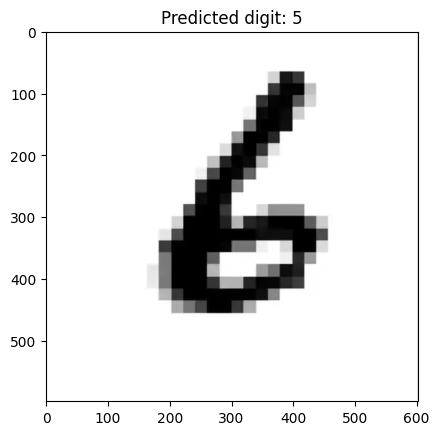

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


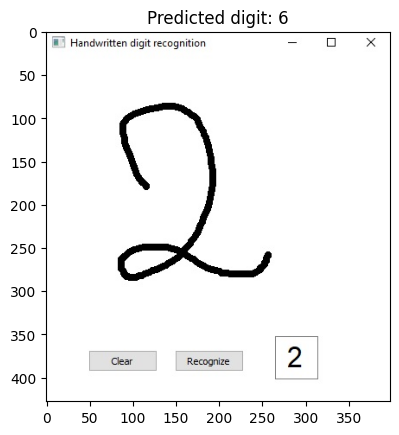

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


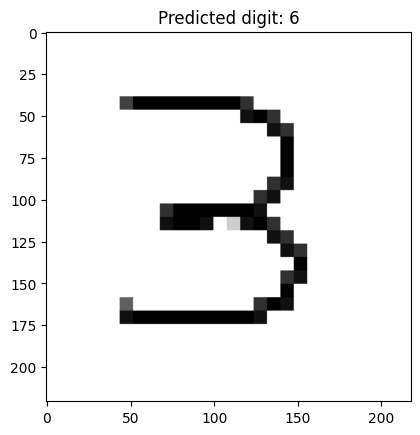

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


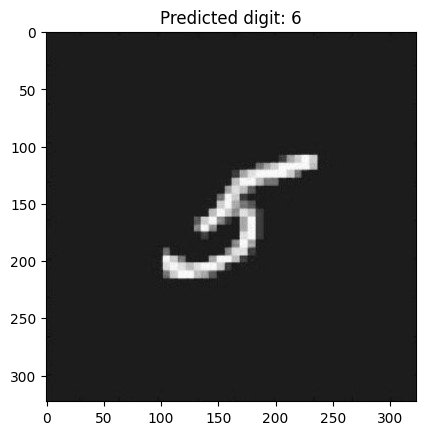

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


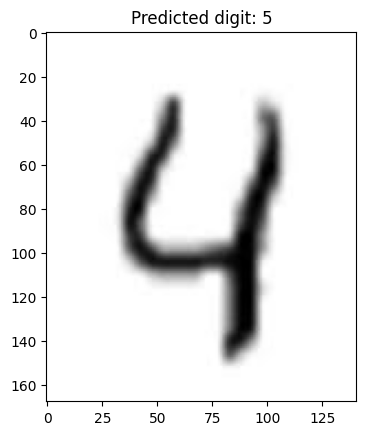

Image: handwritten_6_1.png, Predicted Digit: 5
Image: handwritten_2_1.jpg, Predicted Digit: 6
Image: handwritten_3_1.png, Predicted Digit: 6
Image: handwritten_5_1.png, Predicted Digit: 6
Image: handwritten_4_1.jfif, Predicted Digit: 5


In [ ]:
from google.colab import files
import os
from PIL import Image
from tensorflow.keras.models import load_model

uploaded = files.upload()  #file_picker

# Save uploaded files to a folder
os.makedirs("uploaded_images", exist_ok=True)
for file_name in uploaded.keys():
    with open(f"uploaded_images/{file_name}", "wb") as f:
        f.write(uploaded[file_name])

model = load_model('best_digit_classifier_relu_adam_005.h5')

# Function to process an image
# grayscale -> resize -> normalize -> reshape
def process_image(image_path):

    img = Image.open(image_path)

    img = img.convert('L') # greyscale
    img = img.resize((28, 28))
    img_array = np.array(img) # Convert the image to a numpy array
    img_array = img_array / 255.0  # Normalize pixel values between 0 and 1
    # Reshape the array for model input (batch_size, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

image_folder = "uploaded_images"
predictions = {}

for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    # Process the image
    img_array = process_image(image_path)

    # Predict the digit
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # Save prediction result
    predictions[image_name] = predicted_digit

    # Optionally display the image and prediction
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted digit: {predicted_digit}")
    plt.show()

# Step 5: Print out all the predictions
for image_name, predicted_digit in predictions.items():
    print(f"Image: {image_name}, Predicted Digit: {predicted_digit}")
